In [1]:
import numpy as np
from matplotlib import pyplot as plt

from cosmo_utils.cosmology import (
    Cosmology,
    growth_rate_flat_lcdm,
)

In [2]:
id1 = 'raygal'
id2 = 'raygal_wcdm'

c1 = Cosmology(id1)
c2 = Cosmology(id2)

Loading power spectrum from RayGal_matterpower_z0p0.dat


/home/anferrar/Code/lp/cosmo_utils/src/cosmo_utils/cosmology.py:991: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  integral, _ = quad(integrand, 0.000001, 5, epsabs=0, epsrel=1e-8, limit=200)



--------- After rescaling ---------
sigma8 = 0.80100775
sigma8 from Pk = 0.80100775

Loading power spectrum from pk_wcdmw7v2.dat

--------- After rescaling ---------
sigma8 = 0.85205174
sigma8 from Pk = 0.85205174



In [4]:
z_arr = np.linspace(0, 2.5, 100)

D1 = c1.growth_factor(z_arr)
D1col = c1.growth_factor(z_arr, force_use_colossus=True)
f1 = c1.growth_rate(z_arr)
f1glob = growth_rate_flat_lcdm(z_arr, c1.Omega_m)

D2flcdm = c2.growth_factor(z_arr, force_flat_lcdm_formula=True)
D2col = c2.growth_factor(z_arr)

f2 = c2.growth_rate(z_arr)
f2glob = growth_rate_flat_lcdm(z_arr, c2.Omega_m)

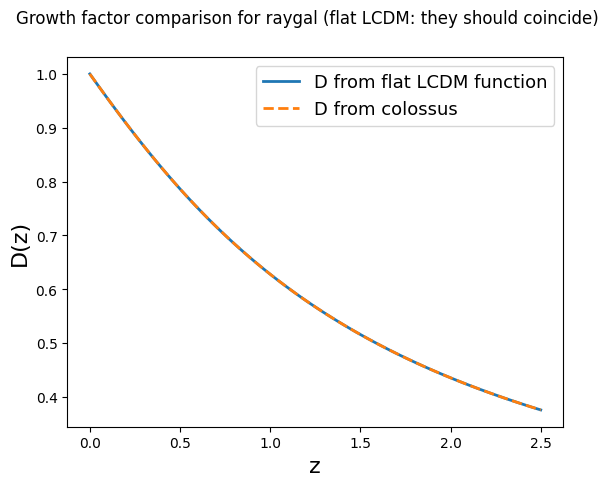

In [5]:
plt.plot(z_arr, D1, label='D from flat LCDM function', lw = 2)
plt.plot(z_arr, D1col, ls ='--', label='D from colossus', lw = 2)
plt.suptitle(f'Growth factor comparison for {id1} (flat LCDM: they should coincide)')
plt.ylabel('D(z)', fontsize=16)
plt.xlabel('z', fontsize=16)
plt.legend(fontsize=13)

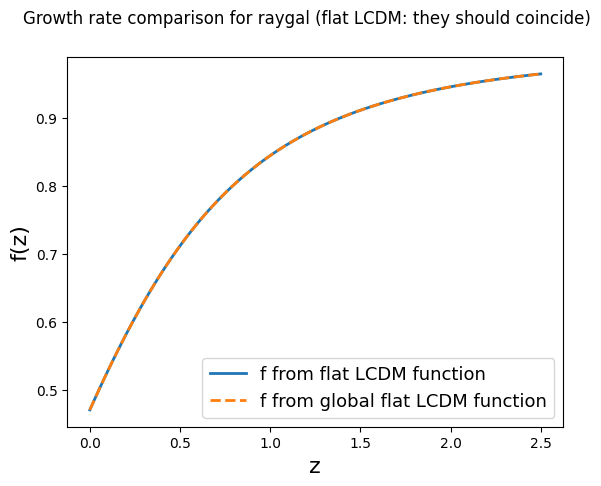

In [6]:
plt.plot(z_arr, f1, label='f from flat LCDM function', lw = 2)
plt.plot(z_arr, f1glob, ls ='--', label='f from global flat LCDM function', lw = 2)
plt.suptitle(f'Growth rate comparison for {id1} (flat LCDM: they should coincide)')
plt.ylabel('f(z)', fontsize=16)
plt.xlabel('z', fontsize=16)
plt.legend(fontsize=13)


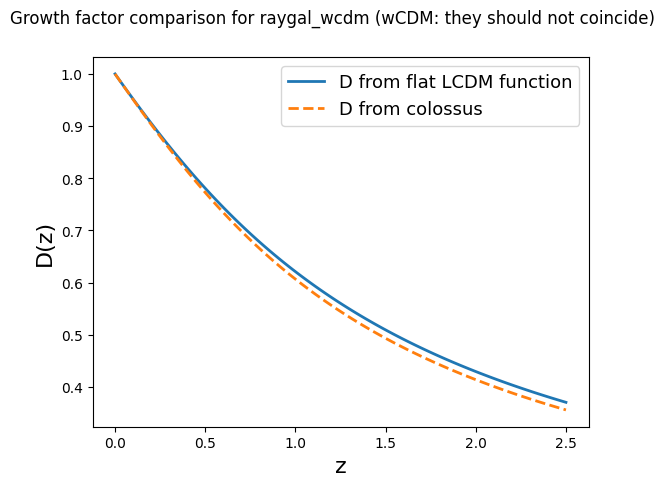

In [ ]:
plt.plot(z_arr, D2flcdm, label='D from flat LCDM function', lw = 2)
plt.plot(z_arr, D2col, ls ='--', label='D from colossus', lw = 2)
plt.suptitle(f'Growth factor comparison for {id2} (wCDM: they should NOT coincide)')
plt.ylabel('D(z)', fontsize=16)
plt.xlabel('z', fontsize=16)
plt.legend(fontsize=13)

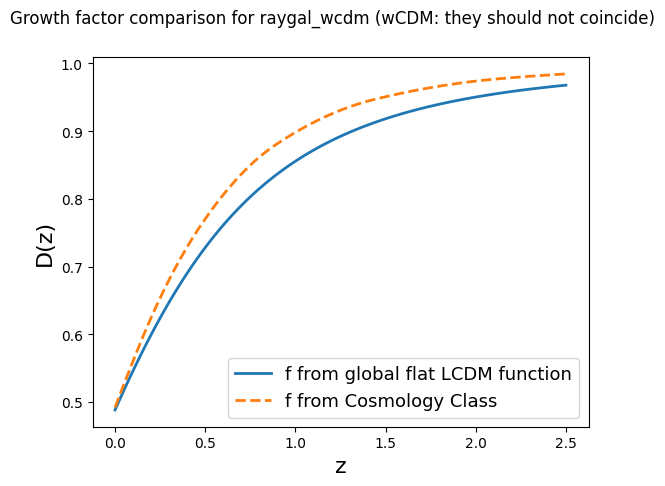

In [ ]:
plt.plot(z_arr, f2glob, label='f from global flat LCDM function', lw = 2)
plt.plot(z_arr, f2, ls ='--', label='f from Cosmology Class', lw = 2)
plt.suptitle(f'Growth factor comparison for {id2} (wCDM: they should NOT coincide)')
plt.ylabel('D(z)', fontsize=16)
plt.xlabel('z', fontsize=16)
plt.legend(fontsize=13)